In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
dataset=pd.read_csv("D:/Udemy-GenAI/multiple_linear_regression_dataset.csv")
dataset.sample(5)

,age,experience,income
4,43,10,47830
11,47,9,46110
15,41,6,38900
18,44,9,44190
2,47,2,31580


In [3]:
dataset.isnull().sum()

age           0
experience    0
income        0
dtype: int64

In [4]:
dataset.describe()

,age,experience,income
count,20.000000,20.000000,20.000000
mean,39.650000,6.200000,40735.500000
std,10.027725,4.124382,8439.797625
min,23.000000,1.000000,27840.000000
25%,31.500000,3.750000,35452.500000
50%,40.000000,5.000000,40190.000000
75%,47.000000,9.000000,45390.000000
max,58.000000,17.000000,63600.000000


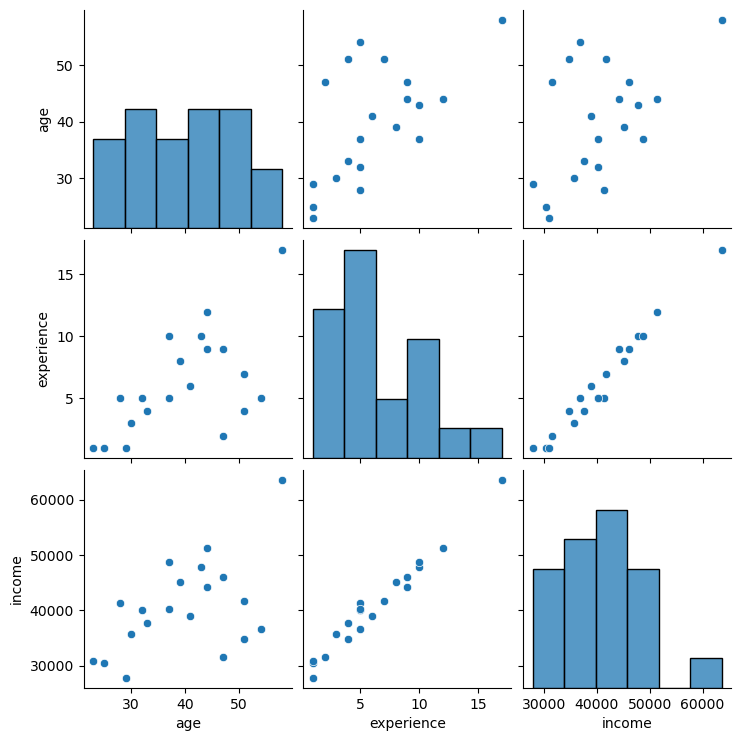

In [5]:
sns.pairplot(dataset)
plt.show()

In [7]:
x=dataset.iloc[:,:-1]
y=dataset['income']

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [9]:
from sklearn.neighbors import KNeighborsRegressor

knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [10]:
knn.score(x_test,y_test)*100

-174.84795643484054

In [11]:
knn.score(x_train,y_train)*100

42.54891890292994

In [14]:
knn.predict([[60,8300]])

c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([51508.])

c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
c:\Users\Asus\anaconda3\Lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


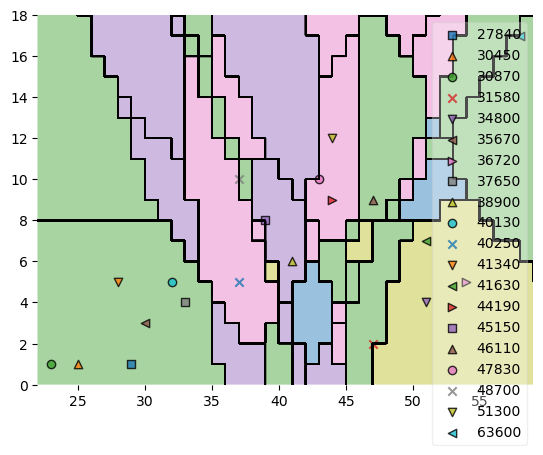

In [16]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=knn)
plt.show()

Post Purning

In [17]:
for i in range(1,20):
    dc2=DecisionTreeClassifier(max_depth=i)
    dc2.fit(x_train,y_train)
    print(dc2.score(x_train,y_train),dc2.score(x_test,y_test))

0.821875 0.9
0.91875 0.9125
0.91875 0.9125
0.93125 0.9125
0.934375 0.9
0.95 0.8625
0.96875 0.85
0.975 0.85
0.98125 0.85
0.984375 0.85
0.990625 0.8375
0.990625 0.8375
0.99375 0.8375
0.996875 0.8375
0.996875 0.8375
0.996875 0.8375
0.996875 0.8375
0.996875 0.8375
0.996875 0.8375


In [13]:
from sklearn.tree import DecisionTreeClassifier

dc1=DecisionTreeClassifier(criterion="entropy")
dc1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [14]:
dc1.score(x_test,y_test)*100

83.75

c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


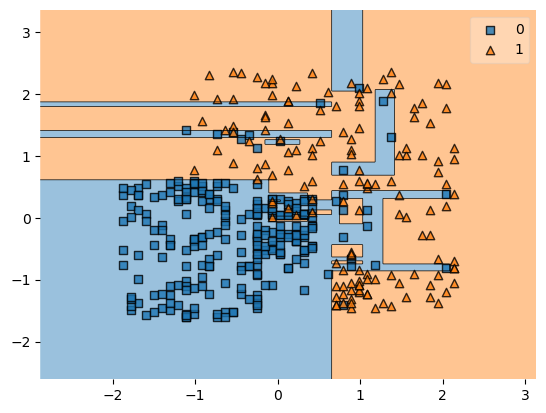

In [15]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=dc1)
plt.show()

[Text(0.5769230769230769, 0.9166666666666666, 'x[1] <= 7.5\nsquared_error = 15.434\nsamples = 16\nvalue = 7.062'),
 Text(0.3076923076923077, 0.75, 'x[1] <= 3.0\nsquared_error = 2.84\nsamples = 9\nvalue = 4.222'),
 Text(0.4423076923076923, 0.8333333333333333, 'True  '),
 Text(0.15384615384615385, 0.5833333333333334, 'x[0] <= 38.0\nsquared_error = 0.25\nsamples = 2\nvalue = 1.5'),
 Text(0.07692307692307693, 0.4166666666666667, 'squared_error = 0.0\nsamples = 1\nvalue = 1.0'),
 Text(0.23076923076923078, 0.4166666666666667, 'squared_error = 0.0\nsamples = 1\nvalue = 2.0'),
 Text(0.46153846153846156, 0.5833333333333334, 'x[1] <= 6.0\nsquared_error = 0.857\nsamples = 7\nvalue = 5.0'),
 Text(0.38461538461538464, 0.4166666666666667, 'x[1] <= 4.5\nsquared_error = 0.222\nsamples = 6\nvalue = 4.667'),
 Text(0.3076923076923077, 0.25, 'squared_error = 0.0\nsamples = 2\nvalue = 4.0'),
 Text(0.46153846153846156, 0.25, 'squared_error = 0.0\nsamples = 4\nvalue = 5.0'),
 Text(0.5384615384615384, 0.41666

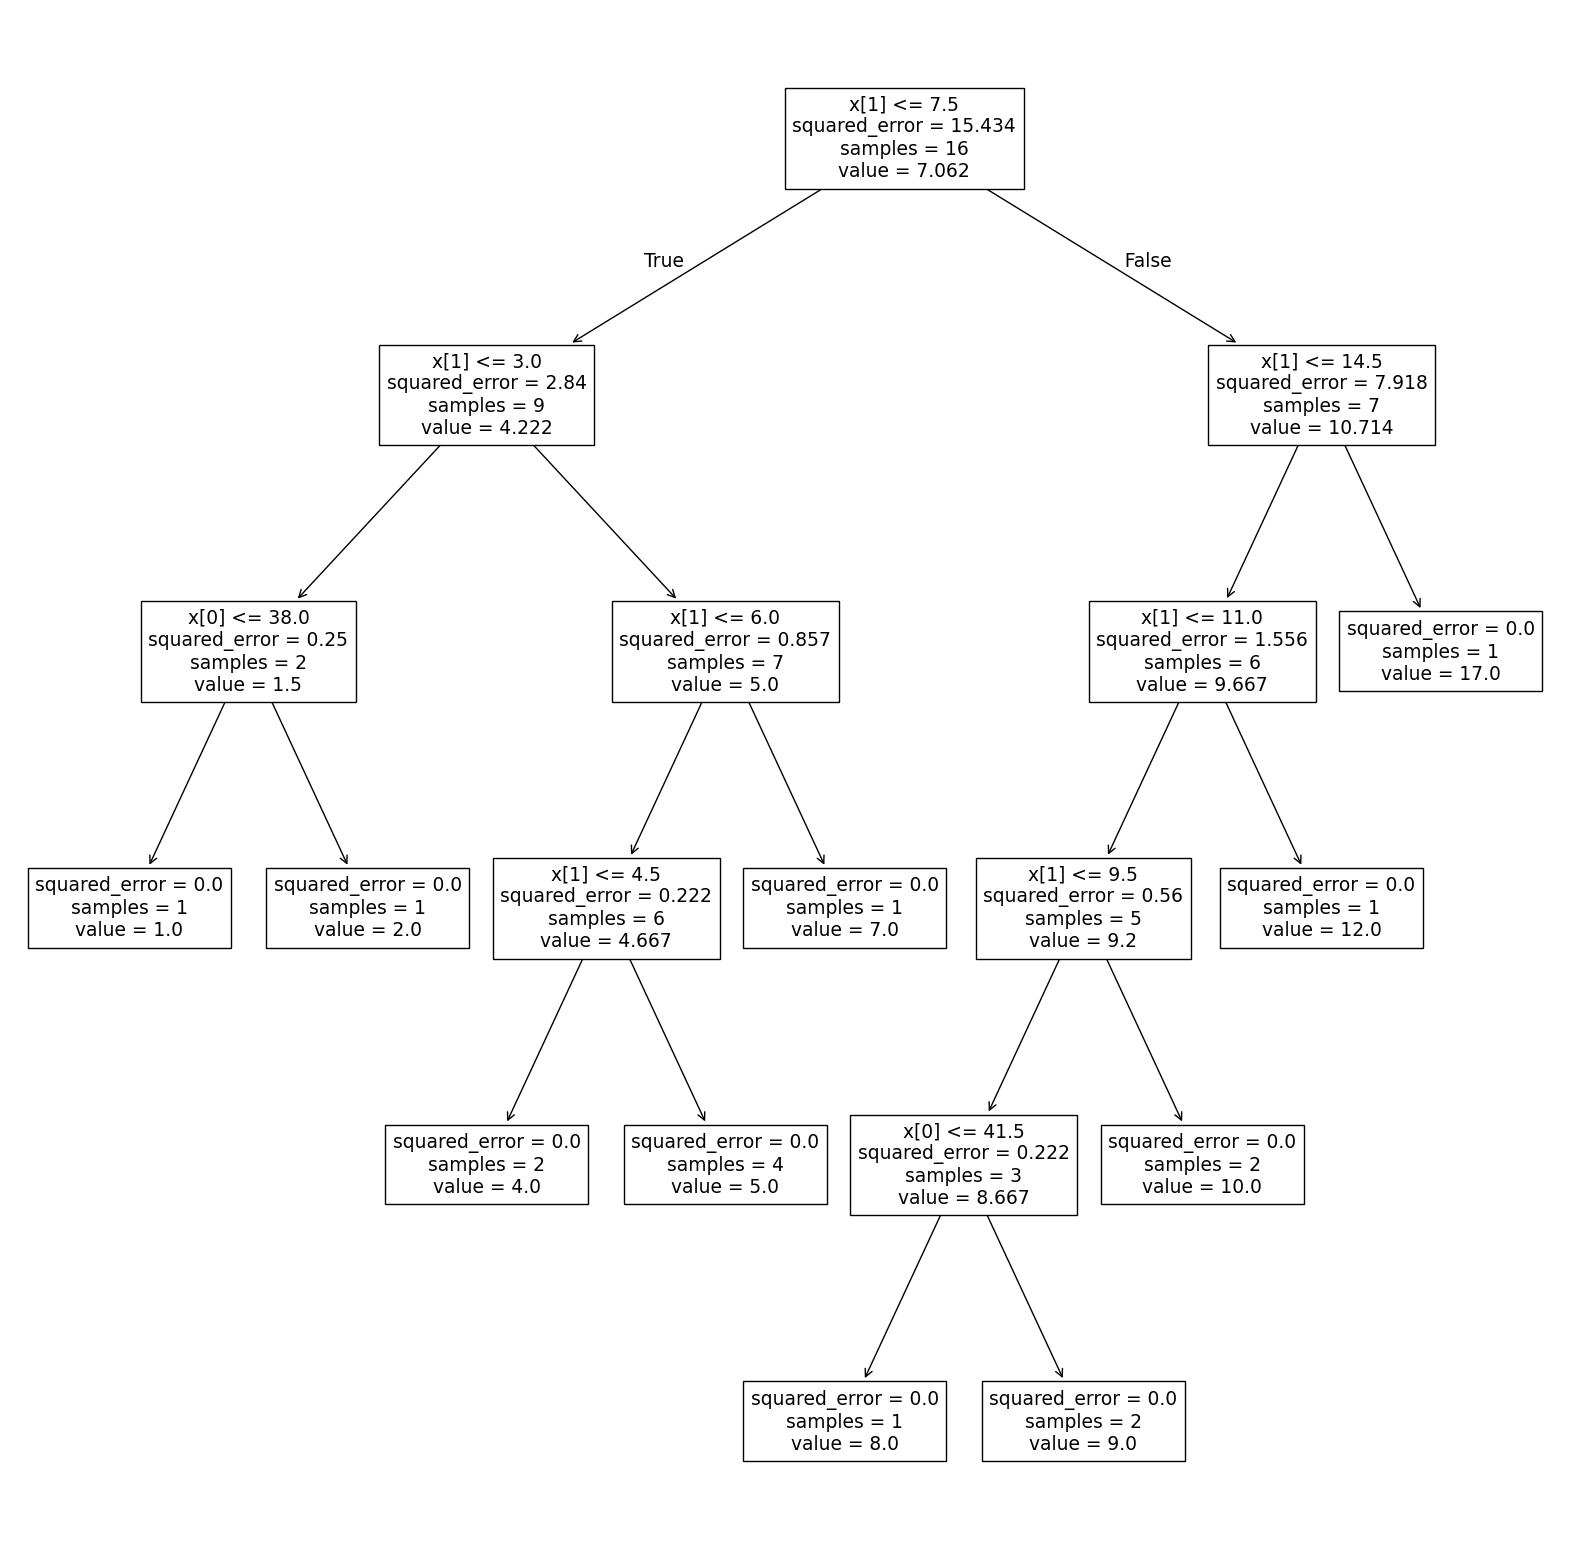

In [19]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20))
plot_tree(dc)